In [ ]:
!pip install tensorflow


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [ ]:
# Load the data
# Replace 'path_to_your_csv.csv' with your file path
data = pd.read_csv('/content/exported_data.csv')

# Parse date and time, assuming columns 'DATE OCC' and 'TIME OCC'
data['DATETIME'] = pd.to_datetime(data['DATE OCC'] + ' ' + data['TIME OCC'].astype(str).str.zfill(4), format='%m/%d/%Y %H%M')

# Aggregate data by day to create a time series
daily_data = data.groupby(data['DATETIME'].dt.date).size().reset_index(name='crime_count')

# Create a time index
daily_data['DATETIME'] = pd.to_datetime(daily_data['DATETIME'])
daily_data.set_index('DATETIME', inplace=True)

# Normalize the 'crime_count' for training
scaler = MinMaxScaler()
daily_data['crime_count_scaled'] = scaler.fit_transform(daily_data[['crime_count']])

 # Crime count

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


462/462 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 2/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 3/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 4/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 5/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 6/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 7/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 8/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 9/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 10/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 11/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 12/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0

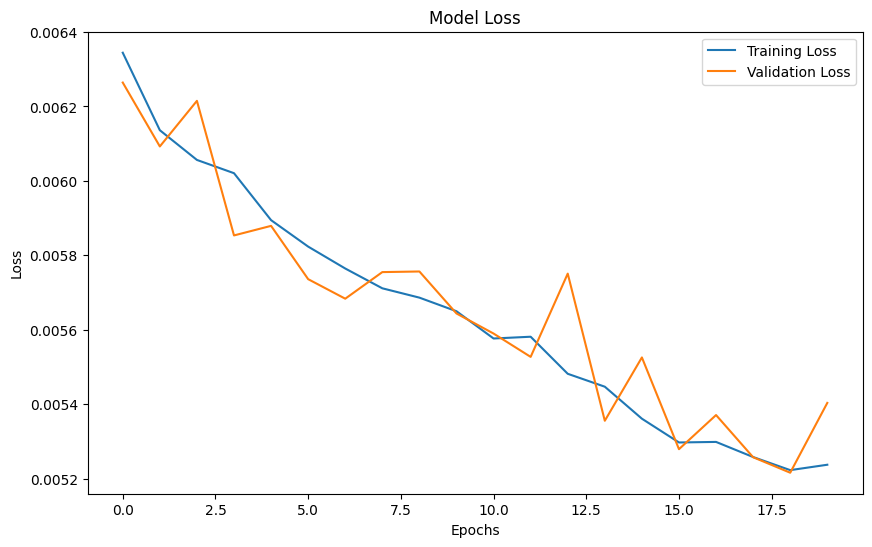

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


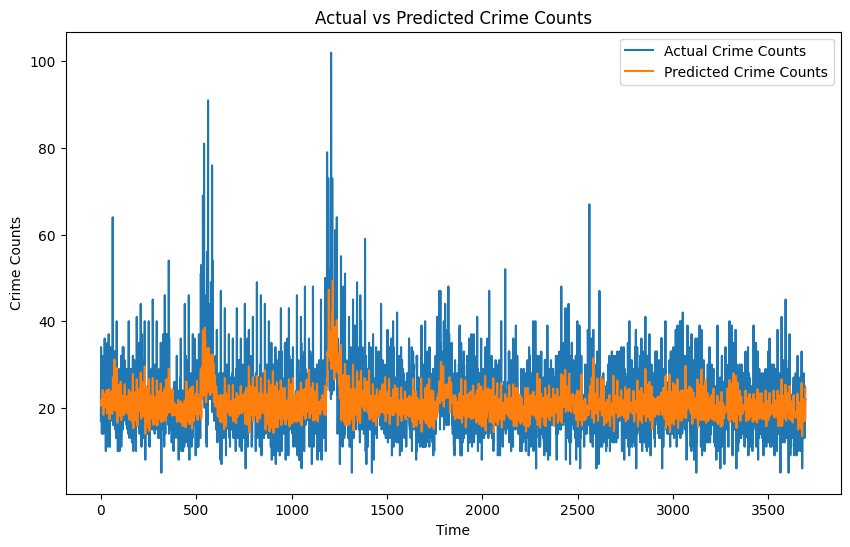

In [ ]:
# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., use the past 30 days to predict the next day)
seq_length = 30
X, y = create_sequences(daily_data['crime_count_scaled'].values, seq_length)

# Reshape data for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Crime Counts')
plt.plot(predictions, label='Predicted Crime Counts')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Time')
plt.ylabel('Crime Counts')
plt.legend()
plt.show()


In [ ]:
model.save('crime_prediction_model_30days.h5')

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


462/462 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0072 - val_loss: 0.0047
Epoch 2/5
462/462 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 3/5
462/462 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 4/5
462/462 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 5/5
462/462 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0038 - val_loss: 0.0038


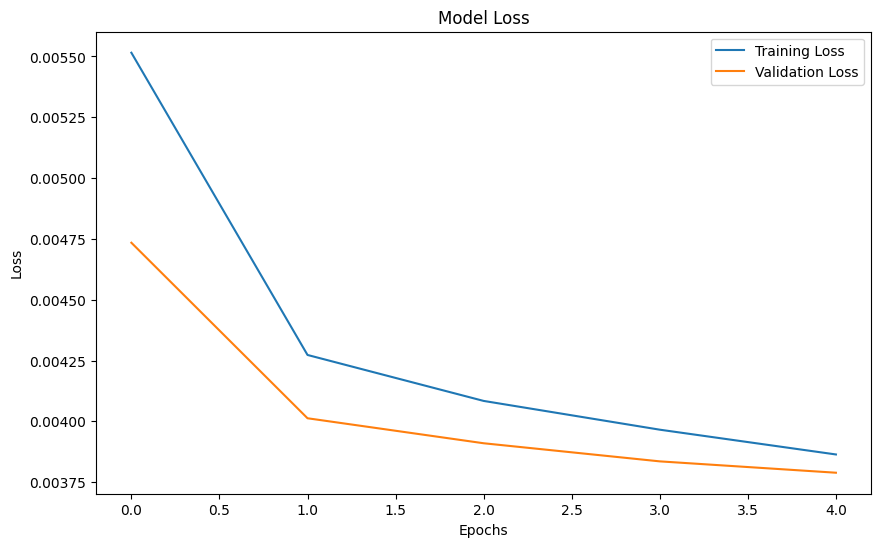

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


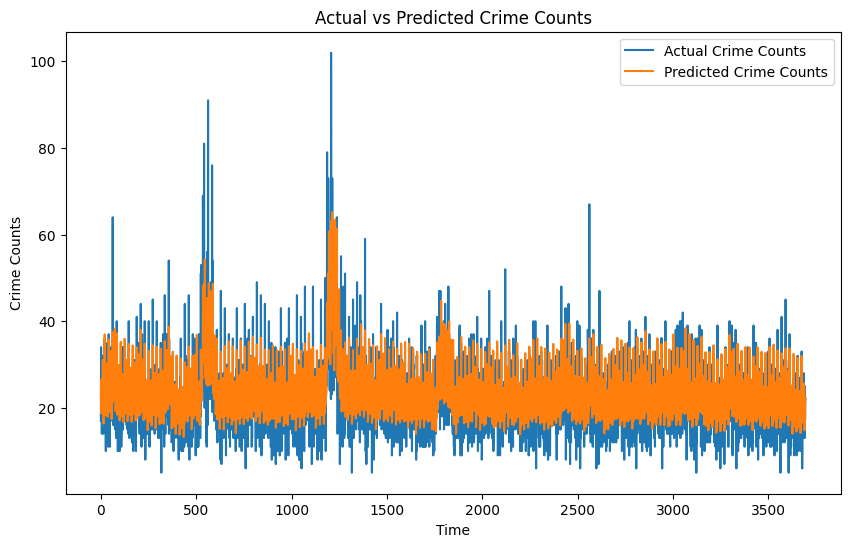

In [ ]:


# Parse date and time, assuming columns 'DATE OCC' and 'TIME OCC'
data['DATETIME'] = pd.to_datetime(data['DATE OCC'] + ' ' + data['TIME OCC'].astype(str).str.zfill(4), format='%m/%d/%Y %H%M')

# Aggregate data by day and area to create a time series
daily_data = data.groupby([data['DATETIME'].dt.date, 'AREA']).size().reset_index(name='crime_count')

# Create a time index
daily_data['DATETIME'] = pd.to_datetime(daily_data['DATETIME'])
daily_data.set_index('DATETIME', inplace=True)

# One-hot encode the 'AREA' column to include it as a feature
encoder = OneHotEncoder()
area_encoded = encoder.fit_transform(daily_data[['AREA']]).toarray()

# Normalize the 'crime_count' for training
scaler = MinMaxScaler()
daily_data['crime_count_scaled'] = scaler.fit_transform(daily_data[['crime_count']])

# Combine encoded area and scaled crime counts into a single array for LSTM input
combined_features = np.hstack((area_encoded, daily_data['crime_count_scaled'].values.reshape(-1, 1)))

# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, -1])  # Target is the scaled crime count (last column)
    return np.array(X), np.array(y)

# Define sequence length (e.g., use the past 30 days to predict the next day)
seq_length = 30
X, y = create_sequences(combined_features, seq_length)

# Reshape data for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split into training and testing data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Crime Counts')
plt.plot(predictions, label='Predicted Crime Counts')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Time')
plt.ylabel('Crime Counts')
plt.legend()
plt.show()


In [ ]:
model.save('crime_prediction_model.h5')